<a href="https://colab.research.google.com/github/jivemachine/DCGAN/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [2]:
# pulling fashion mnist dataset from keras' dataset library
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255 # normalizing train data
X_test = X_test.astype(np.float32) / 255 # normalizing test data
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [3]:
coding_size = 100
# building the generator
generator = keras.models.Sequential([
  keras.layers.Dense(7 * 7 * 128, input_shape=[coding_size]),
  keras.layers.Reshape([7, 7, 128]),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', activation='selu'),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')              
])


In [4]:
# building discriminator
discriminator = keras.models.Sequential([
  keras.layers.Conv2D(64, kernel_size=5, strides=2, padding='same', activation=keras.layers.LeakyReLU(0.2), input_shape=[28, 28, 1]),
  keras.layers.Dropout(0.4),
  keras.layers.Conv2D(128, kernel_size=5, strides=2, padding='same', activation=keras.layers.LeakyReLU(0.2)),
  keras.layers.Dropout(0.4),
  keras.layers.Flatten(),
  keras.layers.Dense(1, activation='sigmoid')                                                                                    
])

In [5]:
gan = keras.models.Sequential([generator, discriminator])

In [6]:
# compiling the discriminator & the gan
discriminator.compile(loss='binary_crossentropy', optimizer="rmsprop")
discriminator.trainable=False
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [7]:
# we need to reshape the training data to the same range as the generator
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape & rescale

In [8]:
# since the training loop is unusual we need to write a custom training loop for the model
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [9]:
# code so we can see the generated images from the gan
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")    

In [10]:
# training loop
def train_dcgan(gan, dataset, batch_size, coding_size, n_epochs=50):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    print("Epoch {}/{}".format(epoch + 1, n_epochs))
    for X_batch in dataset:
      # phase 1 - training the discriminator
      noise = tf.random.normal(shape=[batch_size, coding_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.trainable = False
      discriminator.train_on_batch(X_fake_and_real, y1)
      # phase 2 - training the generator
      noise = tf.random.normal(shape=[batch_size, coding_size])
      y2 = tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)
    plot_multiple_images(generated_images, 8)
    plt.show()                     

Epoch 1/100


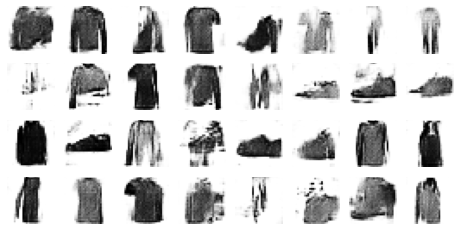

Epoch 2/100


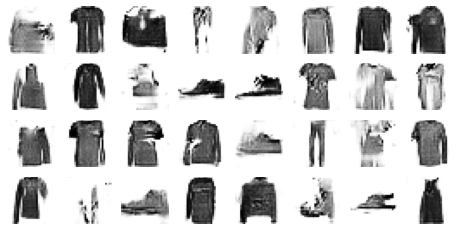

Epoch 3/100


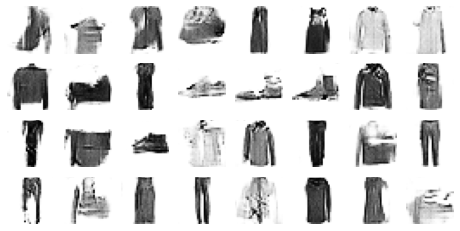

Epoch 4/100


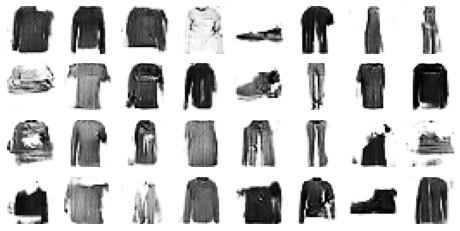

Epoch 5/100


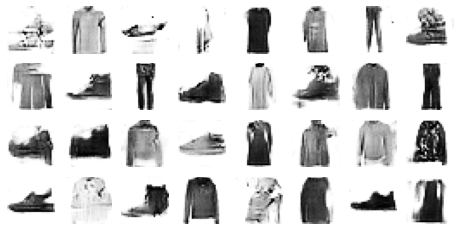

Epoch 6/100


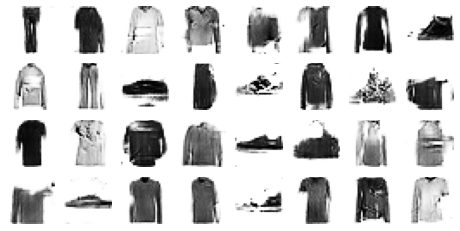

Epoch 7/100


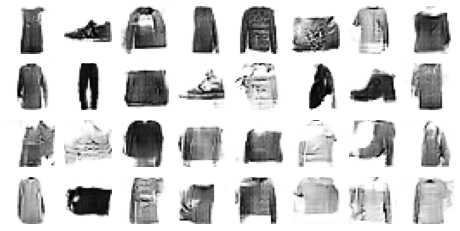

Epoch 8/100


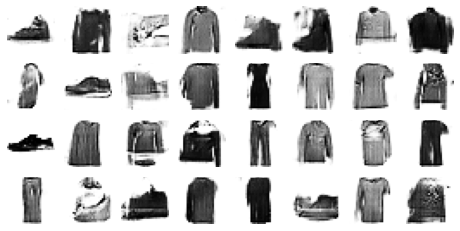

Epoch 9/100


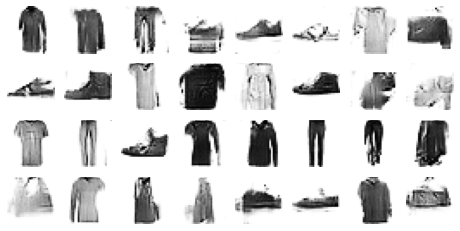

Epoch 10/100


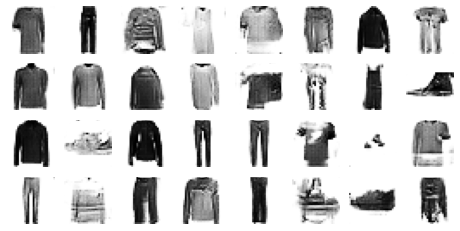

Epoch 11/100


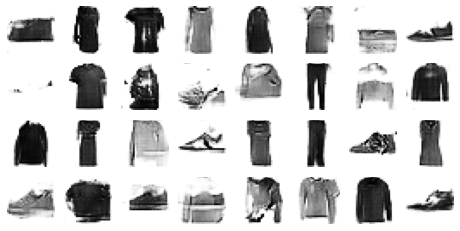

Epoch 12/100


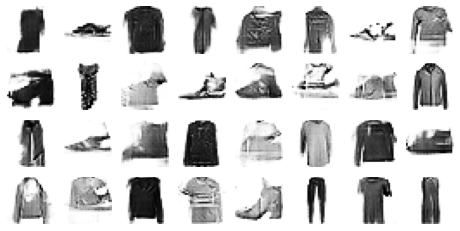

Epoch 13/100


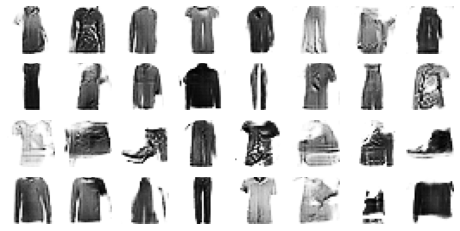

Epoch 14/100


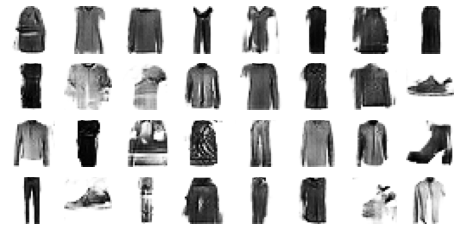

Epoch 15/100


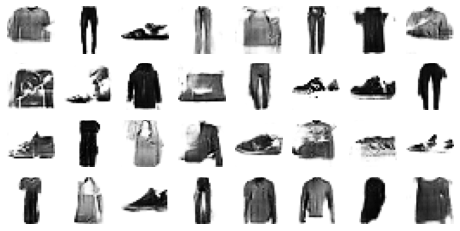

Epoch 16/100


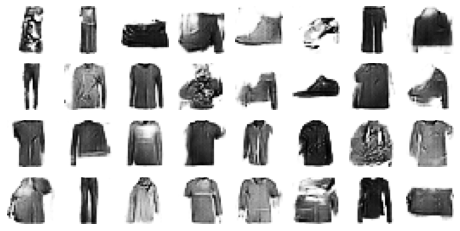

Epoch 17/100


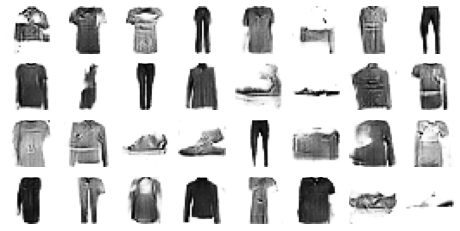

Epoch 18/100


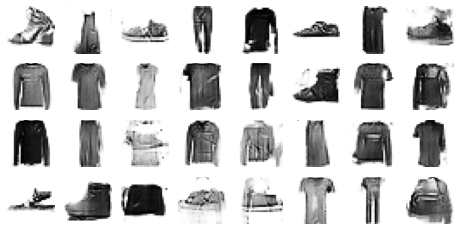

Epoch 19/100


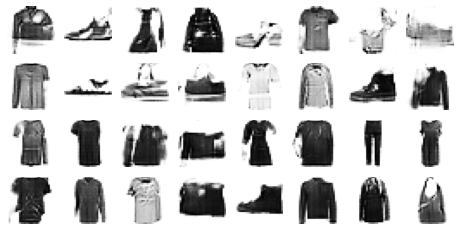

Epoch 20/100


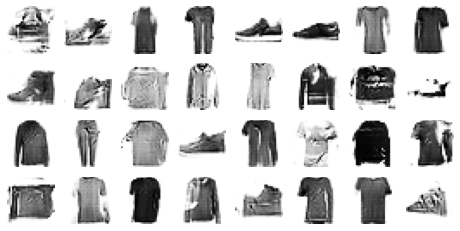

Epoch 21/100


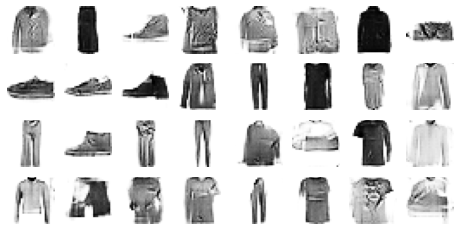

Epoch 22/100


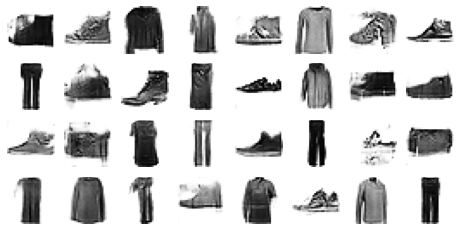

Epoch 23/100


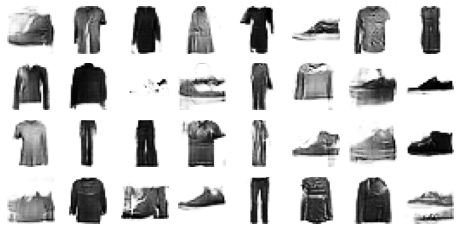

Epoch 24/100


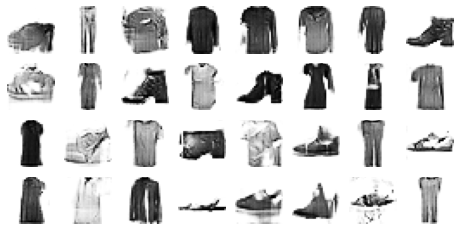

Epoch 25/100


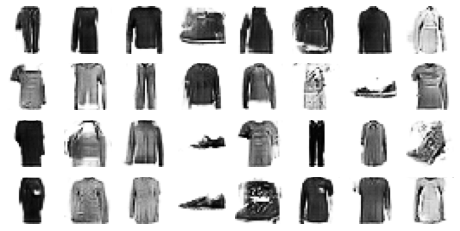

Epoch 26/100


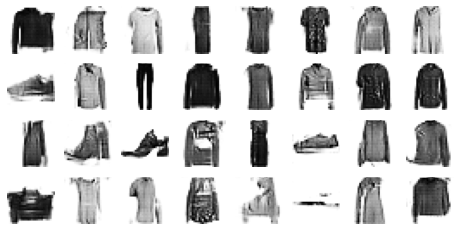

Epoch 27/100


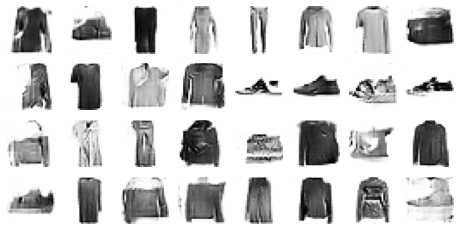

Epoch 28/100


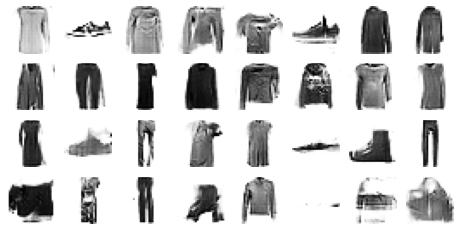

Epoch 29/100


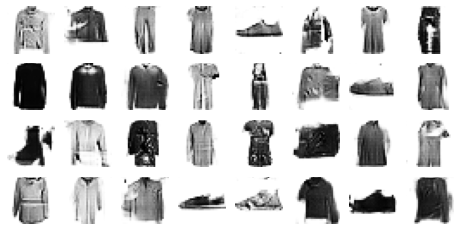

Epoch 30/100


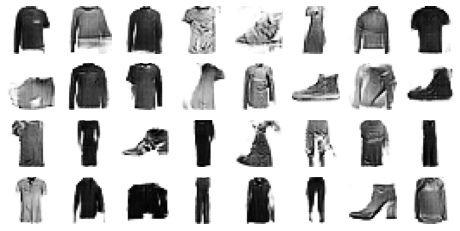

Epoch 31/100


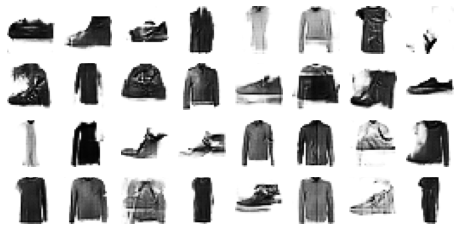

Epoch 32/100


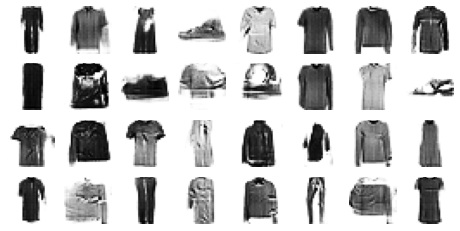

Epoch 33/100


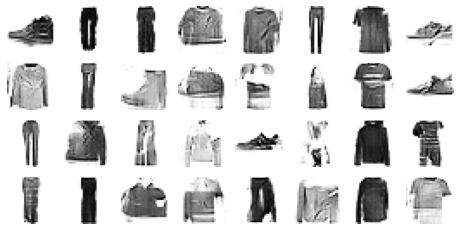

Epoch 34/100


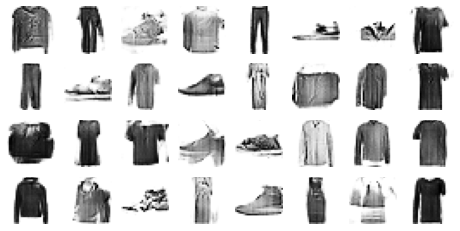

Epoch 35/100


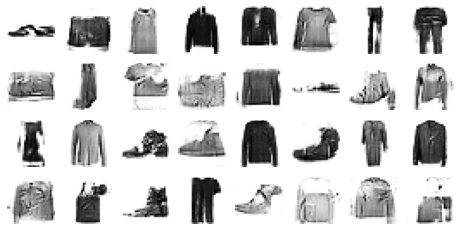

Epoch 36/100


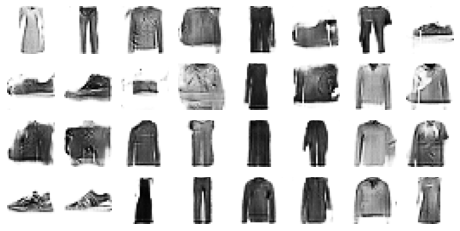

Epoch 37/100


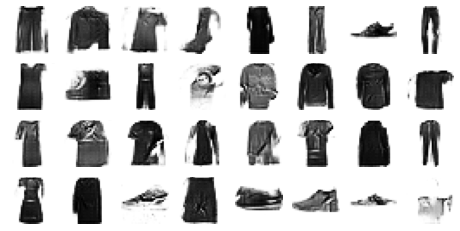

Epoch 38/100


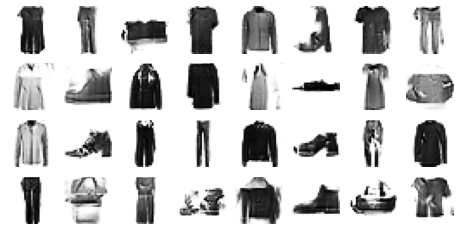

Epoch 39/100


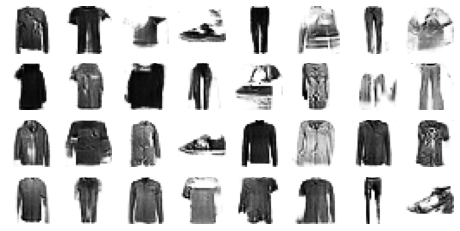

Epoch 40/100


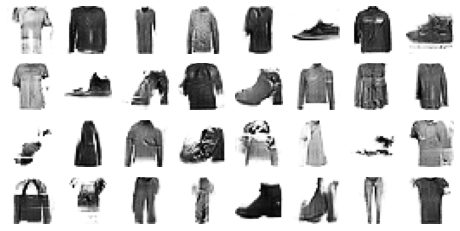

Epoch 41/100


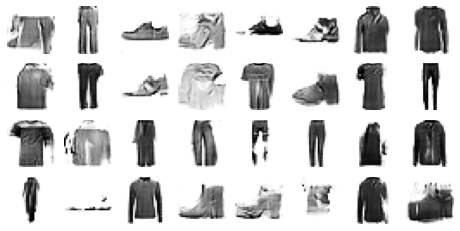

Epoch 42/100


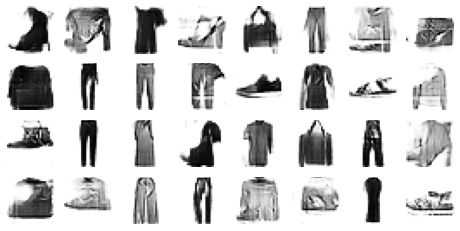

Epoch 43/100


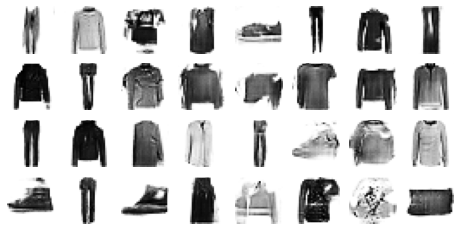

Epoch 44/100


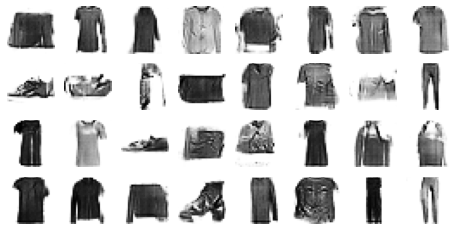

Epoch 45/100


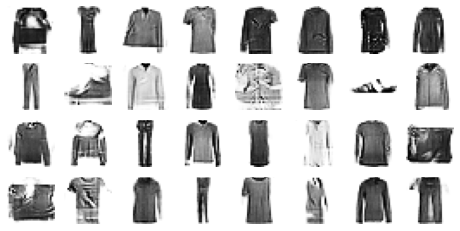

Epoch 46/100


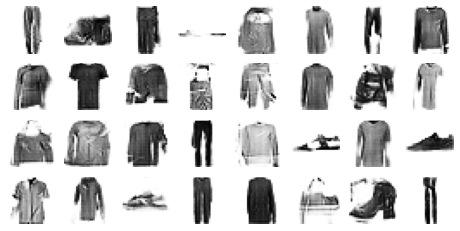

Epoch 47/100


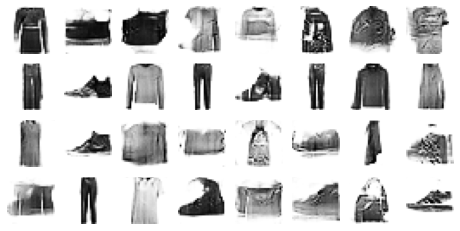

Epoch 48/100


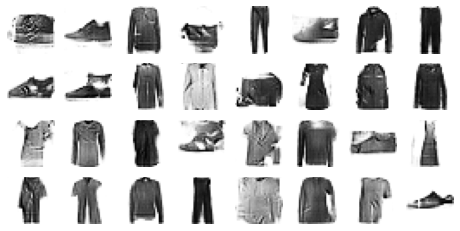

Epoch 49/100


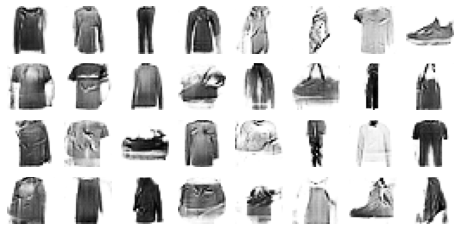

Epoch 50/100


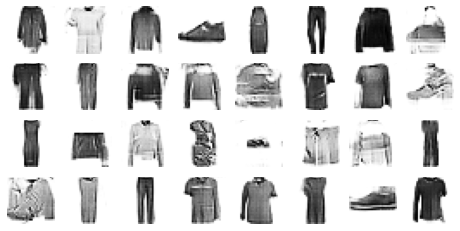

Epoch 51/100


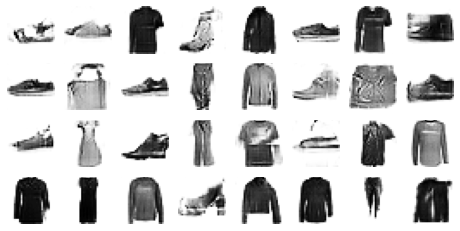

Epoch 52/100


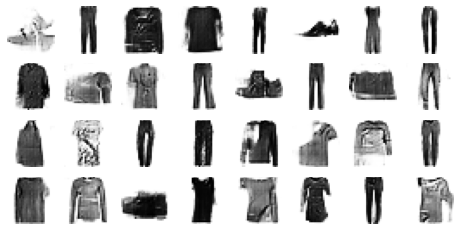

Epoch 53/100


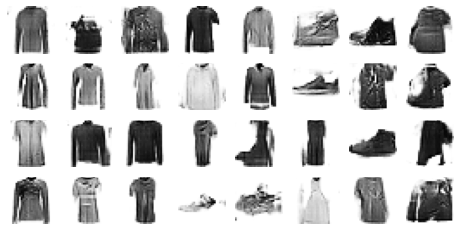

Epoch 54/100


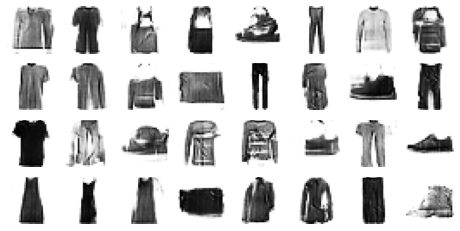

Epoch 55/100


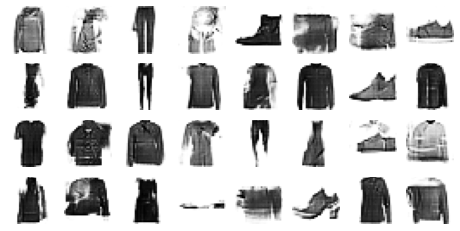

Epoch 56/100


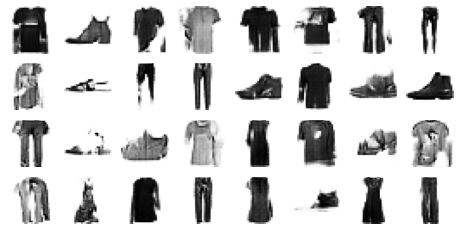

Epoch 57/100


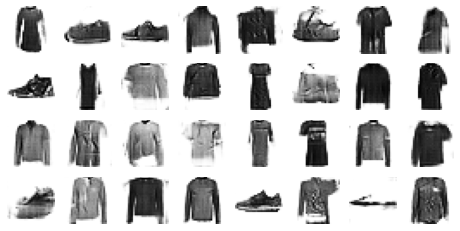

Epoch 58/100


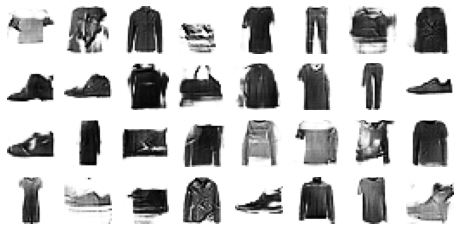

Epoch 59/100


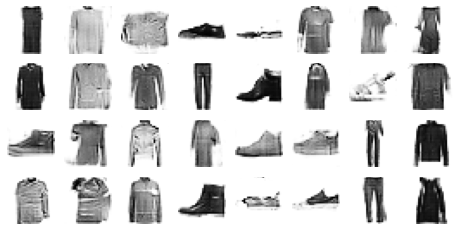

Epoch 60/100


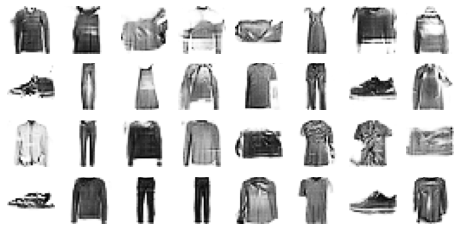

Epoch 61/100


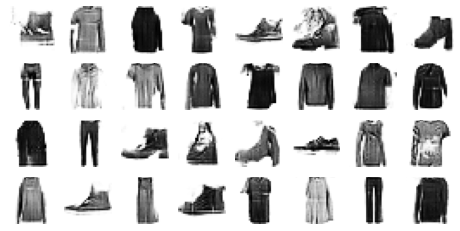

Epoch 62/100


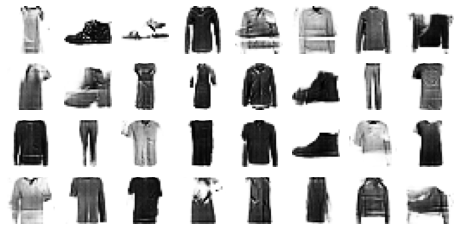

Epoch 63/100


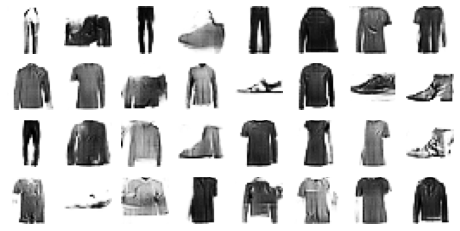

Epoch 64/100


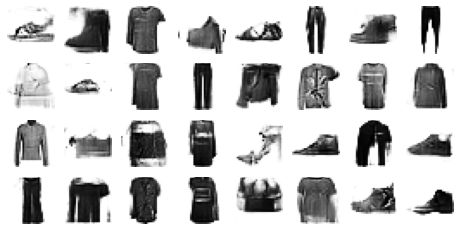

Epoch 65/100


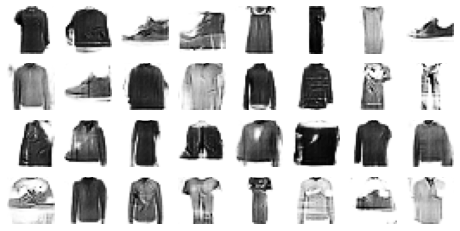

Epoch 66/100


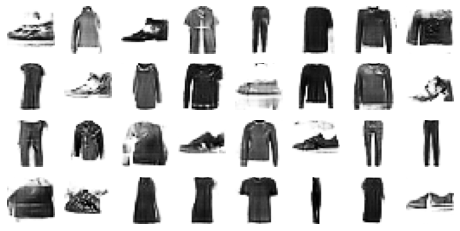

Epoch 67/100


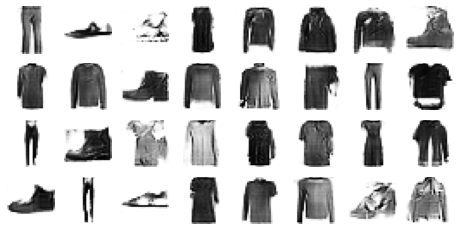

Epoch 68/100


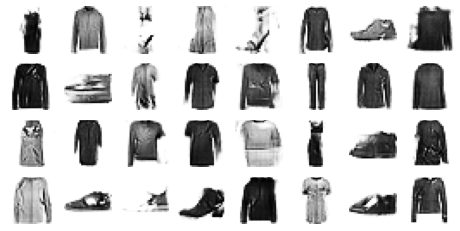

Epoch 69/100


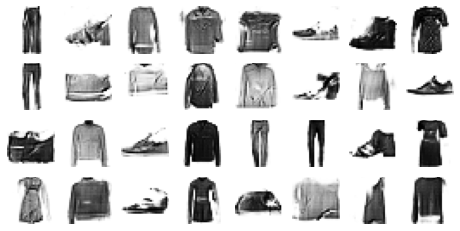

Epoch 70/100


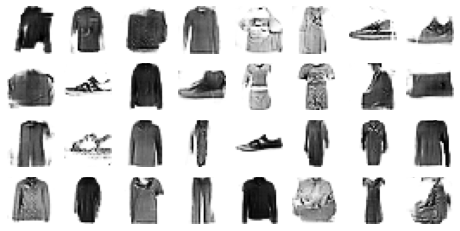

Epoch 71/100


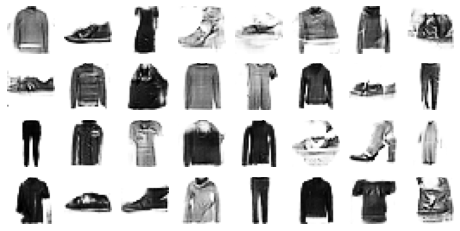

Epoch 72/100


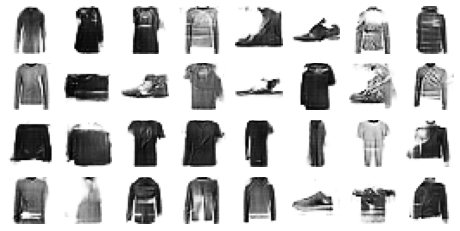

Epoch 73/100


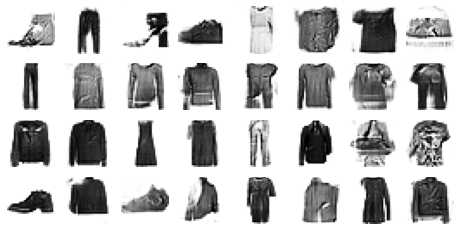

Epoch 74/100


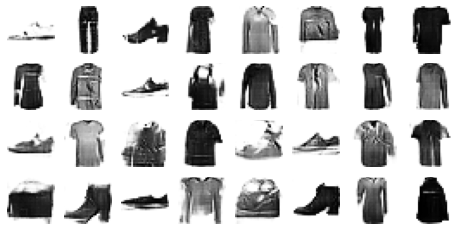

Epoch 75/100


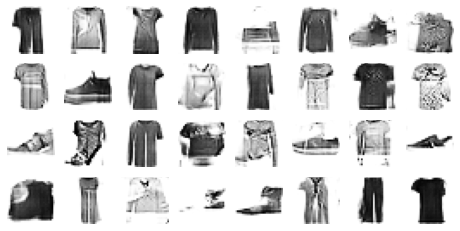

Epoch 76/100


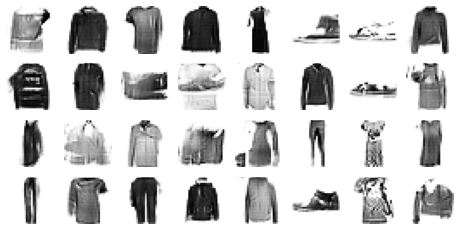

Epoch 77/100


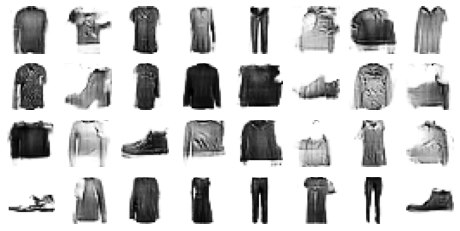

Epoch 78/100


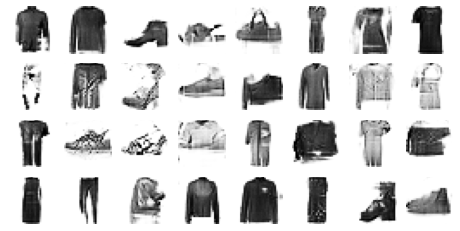

Epoch 79/100


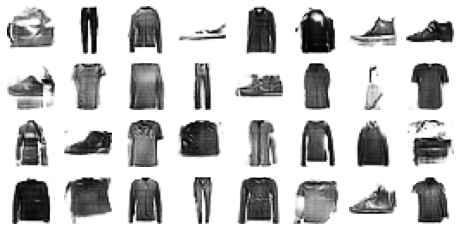

Epoch 80/100


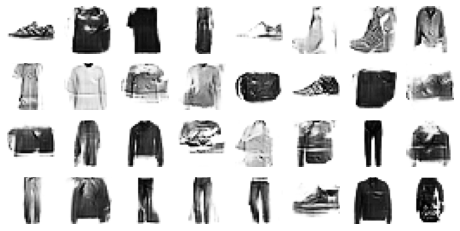

Epoch 81/100


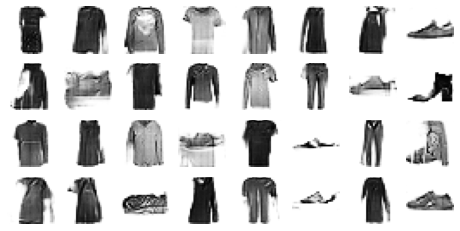

Epoch 82/100


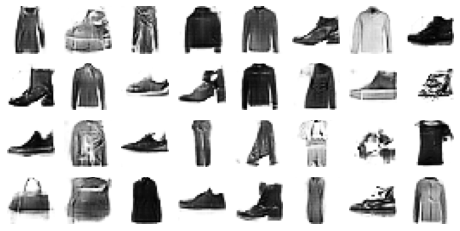

Epoch 83/100


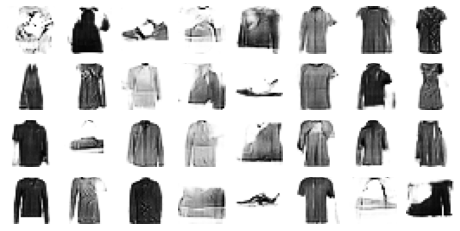

Epoch 84/100


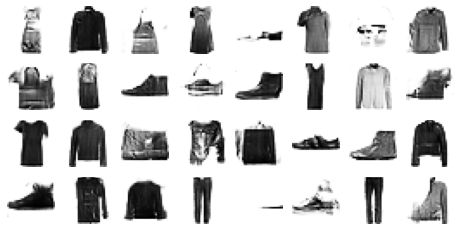

Epoch 85/100


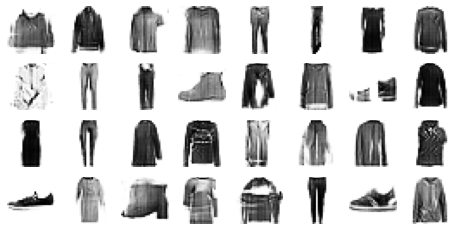

Epoch 86/100


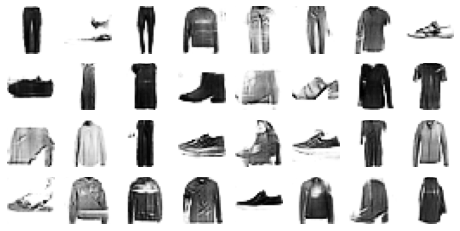

Epoch 87/100


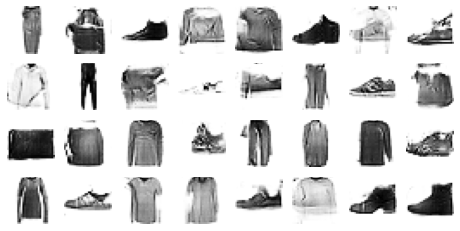

Epoch 88/100


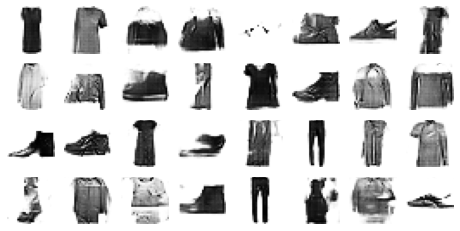

Epoch 89/100


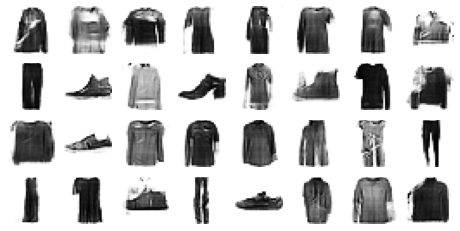

Epoch 90/100


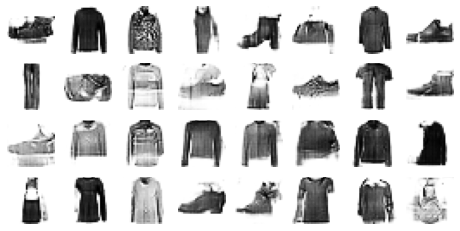

Epoch 91/100


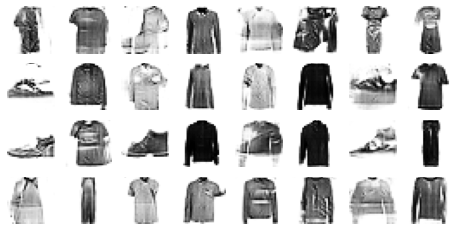

Epoch 92/100


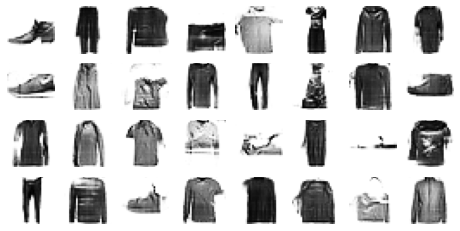

Epoch 93/100


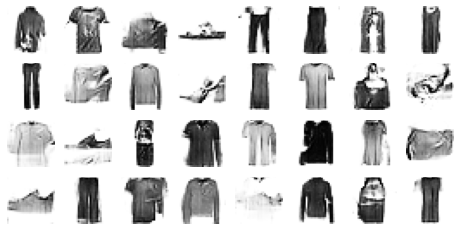

Epoch 94/100


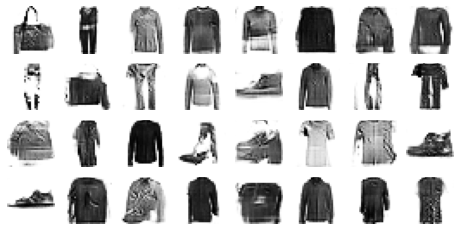

Epoch 95/100


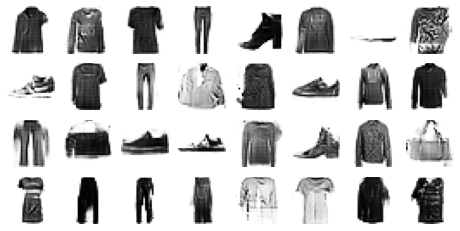

Epoch 96/100


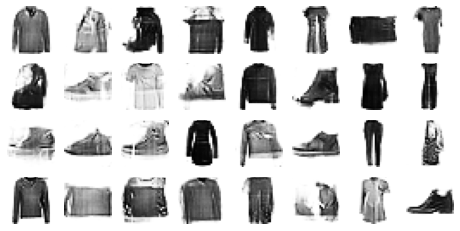

Epoch 97/100


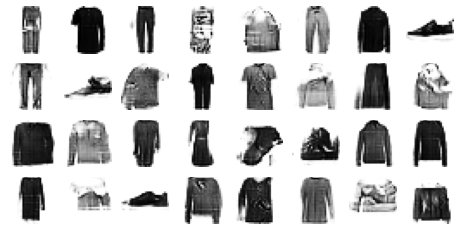

Epoch 98/100


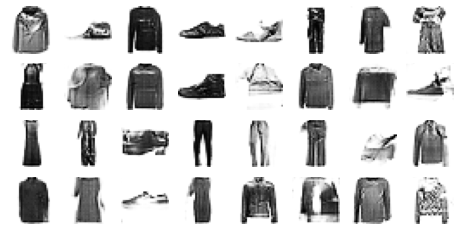

Epoch 99/100


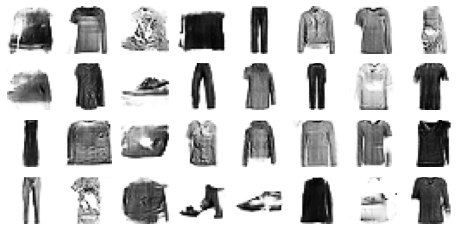

Epoch 100/100


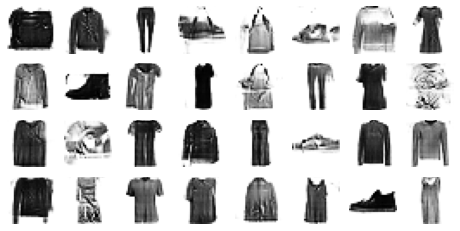

In [11]:
# training DCGAN for 100 epochs
train_dcgan(gan, dataset, batch_size, coding_size, n_epochs=100)

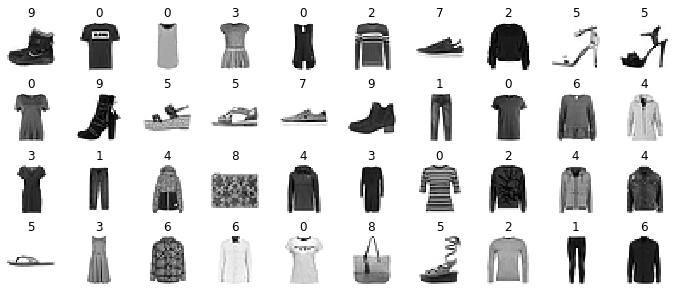

In [12]:
# images from the original dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()